**PART 1:Preparation**

In [122]:
#importing dataset
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (4).csv


In [123]:
#a quick look to dataset
import pandas as pd
OD=pd.read_csv("data.csv")
OD.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [124]:
#In order to analyse dataset's features type and determining the missing/null values,I use info()
OD.info() # Unnamed: 32,id columns are useless and target is a categorical type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [125]:
OD['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

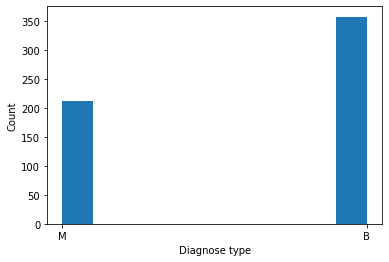

In [126]:
import matplotlib.pyplot as plt #relatively unbalanced data
plt.hist(OD["diagnosis"])
plt.xlabel("Diagnose type")
plt.ylabel("Count")
plt.show()

In [127]:
OD.drop(columns=['id','Unnamed: 32']).describe() #quick statistical values

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [128]:
OD.drop(columns=['id','Unnamed: 32'])[OD["diagnosis"]=="M"].describe()#quick statistical values for malignant class

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,0.345039,0.483178,2.568546,61.355268,0.002890,0.018387,0.021603,0.005517,0.010065,0.002041,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,0.193800,0.362100,1.334000,13.990000,0.002667,0.008422,0.011010,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,0.390375,0.892825,2.715500,35.762500,0.005085,0.019662,0.026998,0.011415,0.014615,0.002688,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,0.547200,1.102500,3.679500,58.455000,0.006209,0.028590,0.037125,0.014205,0.017700,0.003739,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,0.757300,1.429250,5.206250,94.000000,0.007971,0.038910,0.050443,0.017497,0.022132,0.004892,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,3.568000,21.980000,542.200000,0.031130,0.135400,0.143800,0.040900,0.078950,0.012840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [129]:
OD.drop(columns=['id','Unnamed: 32'])[OD["diagnosis"]=="B"].describe()#quick statistical values for beign class

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.22038,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,0.112570,0.58918,0.771169,8.843472,0.003061,0.016352,0.032918,0.005709,0.006999,0.002938,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,0.111500,0.36020,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,0.207300,0.79590,1.445000,15.260000,0.005212,0.011320,0.010990,0.006433,0.015600,0.002074,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,0.257500,1.10800,1.851000,19.630000,0.006530,0.016310,0.018400,0.009061,0.019090,0.002808,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,0.341600,1.49200,2.388000,25.030000,0.008534,0.025890,0.030560,0.011870,0.024060,0.004174,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,0.881100,4.88500,5.118000,77.110000,0.021770,0.106400,0.396000,0.052790,0.061460,0.029840,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [0]:
OD.drop(columns=['Unnamed: 32'],inplace=True) #deleting useless column

In [131]:
#creating normalized dataset as ND
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ND=scaler.fit_transform(OD.drop(columns=['id','diagnosis']))
ND=pd.DataFrame(ND,columns=OD.columns[2:])
ND['id']=OD["id"]
ND['diagnosis']=OD['diagnosis']
#A quick look to ND
ND.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,id,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,842302,M
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,842517,M
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,84300903,M
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,84348301,M
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,84358402,M


In [0]:
#Prepration to clustring algorithms
x_od=OD.drop(columns=['id','diagnosis'])
y_od=OD['diagnosis']
x_nd=ND.drop(columns=['id','diagnosis'])
y_nd=ND['diagnosis']

**PART 2: Clustering**

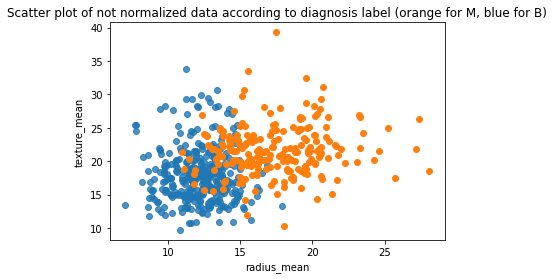

In [133]:
#Reference graph for clustring algorithm's accuracies
tempM=OD[OD.diagnosis=='M']
tempB=OD[OD.diagnosis=='B']
plt.scatter(tempB['radius_mean'],tempB['texture_mean'],alpha=0.8)
plt.scatter(tempM['radius_mean'],tempM['texture_mean'],alpha=1)
plt.title('Scatter plot of not normalized data according to diagnosis label (orange for M, blue for B)')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

Clustering algorithm's for orjinal and normalized dataset (all features included)$$$$
**NOTE:Since we already know the labels i extracted cluster analyis reports for all cluster algorithms**

In [0]:
def fitAndPlotCluster(data,feature_x,feature_y,title,alpha1,alpha2):
  kmeansnd = KMeans(n_clusters=2, random_state=42).fit(data)
  y_kmeansnd = kmeansnd.fit_predict(data)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  scatter = ax.scatter(data[y_kmeansnd==1][feature_x],data[y_kmeansnd==1][feature_y],c="blue",s=50,alpha =alpha1)
  scatter = ax.scatter(data[y_kmeansnd==0][feature_x],data[y_kmeansnd==0][feature_y],c="red",s=50,alpha=alpha2)
  ax.set_title(title)
  ax.set_xlabel(feature_x)
  ax.set_ylabel(feature_y)
  return y_kmeansnd

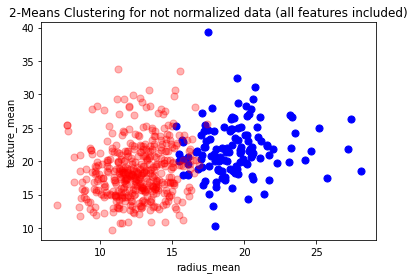

In [135]:
#no featured reduction no normalized data clustering
from sklearn.cluster import KMeans
y_kmeans=fitAndPlotCluster(x_od,"radius_mean","texture_mean","2-Means Clustering for not normalized data (all features included)",1,0.3)

In [136]:
#Cluster report for not normalized data (all features included)
from sklearn.metrics import classification_report
tempM=pd.DataFrame(OD[y_kmeans==0]["id"])#we say all malignant
tempB=pd.DataFrame(OD[y_kmeans==1]["id"])#we say all beningn
tempM["diagnosis"]="B"
tempB["diagnosis"]="M"
result = pd.concat([tempM,tempB])
true_labels=OD.sort_values("id")["diagnosis"]
predicted_labels=result.sort_values("id")["diagnosis"]
print("Cluster report for not normalized data (all features included)\n",classification_report(true_labels, predicted_labels),"\n")
print("------------------------------------------------------------------------------------------------------------------------\n")
print("Not normalized datasets cluster 1 value counts (all features are included)\n",OD[y_kmeans==0]['diagnosis'].value_counts(),"\n")
print("Cluster 1 percentages\nMalignant percentage:",(82/(82+356)),"\nBenign percentage:",(356/(82+356)),"\n")
print("------------------------------------------------------------------------------------------------------------------------\n")
print("Not normalized datasets cluster 2 value counts (all features are included)\n",OD[y_kmeans==1]['diagnosis'].value_counts(),"\n")
print("Cluster 2 percentages\nMalignant percentage:",(130/(131)),"\nBenign percentage:",(1/(131)),"\n")

Cluster report for not normalized data (all features included)
               precision    recall  f1-score   support

           B       0.81      1.00      0.90       357
           M       0.99      0.61      0.76       212

    accuracy                           0.85       569
   macro avg       0.90      0.81      0.83       569
weighted avg       0.88      0.85      0.84       569
 

------------------------------------------------------------------------------------------------------------------------

Not normalized datasets cluster 1 value counts (all features are included)
 B    356
M     82
Name: diagnosis, dtype: int64 

Cluster 1 percentages
Malignant percentage: 0.1872146118721461 
Benign percentage: 0.8127853881278538 

------------------------------------------------------------------------------------------------------------------------

Not normalized datasets cluster 2 value counts (all features are included)
 M    130
B      1
Name: diagnosis, dtype: int64 

Cluster

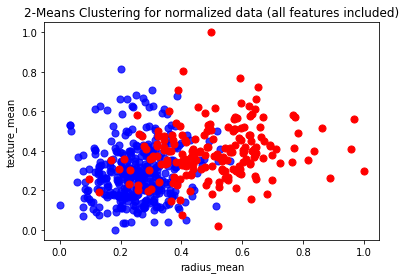

In [137]:
#no featured reduction normalized data clustering
y_kmeansnd =fitAndPlotCluster(x_nd,"radius_mean","texture_mean","2-Means Clustering for normalized data (all features included)",0.8,1)

In [138]:
from sklearn.metrics import classification_report
tempM=pd.DataFrame(ND[y_kmeansnd==0]["id"])#we say all malignant
tempB=pd.DataFrame(ND[y_kmeansnd==1]["id"])#we say all beningn
tempM["diagnosis"]="M"
tempB["diagnosis"]="B"
result = pd.concat([tempM,tempB])
true_labels=ND.sort_values("id")["diagnosis"]
predicted_labels=result.sort_values("id")["diagnosis"]
print("Cluster report for normalized data (all features included)\n",classification_report(true_labels, predicted_labels),"\n")
print("------------------------------------------------------------------------------------------------------------------------\n")
print("Normalized datasets cluster 1 value counts (all features are included)\n",ND[y_kmeansnd==0]['diagnosis'].value_counts(),"\n")
print("Cluster 1 percentages\nMalignant percentage:",(180/189),"\nBenign percentage:",(9/189),"\n")
print("------------------------------------------------------------------------------------------------------------------------\n")
print("Normalized datasets cluster 2 value counts (all features are included)\n",ND[y_kmeansnd==1]['diagnosis'].value_counts(),"\n")
print("Cluster 2 percentages\nMalignant percentage:",(32/(348+32)),"\nBenign percentage:",(348/(348+32)),"\n")

Cluster report for normalized data (all features included)
               precision    recall  f1-score   support

           B       0.92      0.97      0.94       357
           M       0.95      0.85      0.90       212

    accuracy                           0.93       569
   macro avg       0.93      0.91      0.92       569
weighted avg       0.93      0.93      0.93       569
 

------------------------------------------------------------------------------------------------------------------------

Normalized datasets cluster 1 value counts (all features are included)
 M    180
B      9
Name: diagnosis, dtype: int64 

Cluster 1 percentages
Malignant percentage: 0.9523809523809523 
Benign percentage: 0.047619047619047616 

------------------------------------------------------------------------------------------------------------------------

Normalized datasets cluster 2 value counts (all features are included)
 B    348
M     32
Name: diagnosis, dtype: int64 

Cluster 2 percent

I want to reduce dimetion so i won't include not-correlated features or features that have multi-colinerty problem therefore i inspect to the corelations$$$$
**Note:Since i know the label values,I can analyse the feature selection's effects in clustring algorithms in this experiment**$$$$
**Note 2: If i wouldn't know the target values, i only analysed collinerity between features not target or used some other algorithms for feature selection/dimension reduction.Therefore below i used PCA for dimension reduction.**

In [0]:
dummy=pd.get_dummies(ND["diagnosis"])
dummy_ND=ND.drop(columns=["diagnosis"])
dummy_ND["diagnosis"]=dummy["M"]

In [140]:
dummy_ND.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,id,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.074626,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.099770,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.073159,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.096893,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.012968,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.000096,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.050080,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.044158,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.022114,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.052511,-0.012838


In [0]:
useable_features=[0,1,2,3,6,7,20,22,23,26,27]
unseable_columns=[]
j=0
for i in ND.columns:
  if(j not in useable_features):
    unseable_columns.append(i)
  j+=1 
ND_arranged=ND.drop(columns=unseable_columns)  

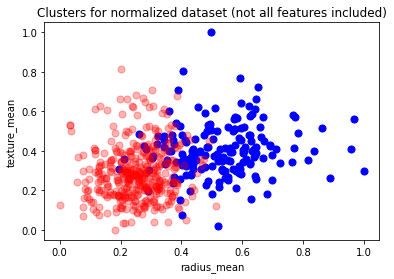

In [142]:
y_kmeans_ND_arranged=fitAndPlotCluster(ND_arranged,"radius_mean","texture_mean","Clusters for normalized dataset (not all features included)",1,0.3)

In [143]:
tempM=pd.DataFrame(ND[y_kmeans_ND_arranged==1]["id"])#we say all malignant
tempB=pd.DataFrame(ND[y_kmeans_ND_arranged==0]["id"])#we say all beningn
tempM["diagnosis"]="M"
tempB["diagnosis"]="B"
result = pd.concat([tempM,tempB])
true_labels=ND.sort_values("id")["diagnosis"]
predicted_labels=result.sort_values("id")["diagnosis"]
print("Cluster report for normalized data (not all features included)\n",classification_report(true_labels, predicted_labels),"\n")
print("------------------------------------------------------------------------------------------------------------------------\n")
print("Normalized datasets cluster 1 value counts (not all features are included)\n",ND[y_kmeans_ND_arranged==0]['diagnosis'].value_counts(),"\n")
print("------------------------------------------------------------------------------------------------------------------------\n")
print("Normalized datasets cluster 2 value counts (not all features are included)\n",ND[y_kmeans_ND_arranged==1]['diagnosis'].value_counts(),"\n")

Cluster report for normalized data (not all features included)
               precision    recall  f1-score   support

           B       0.90      1.00      0.95       357
           M       0.99      0.81      0.89       212

    accuracy                           0.93       569
   macro avg       0.95      0.90      0.92       569
weighted avg       0.93      0.93      0.93       569
 

------------------------------------------------------------------------------------------------------------------------

Normalized datasets cluster 1 value counts (not all features are included)
 B    356
M     40
Name: diagnosis, dtype: int64 

------------------------------------------------------------------------------------------------------------------------

Normalized datasets cluster 2 value counts (not all features are included)
 M    172
B      1
Name: diagnosis, dtype: int64 



Clustering with PCA

In [144]:
#pca usage 
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(dummy_ND.drop(columns=["diagnosis"]))
#Analysing explained variance ratio
print("Variance ratio\n",pca.explained_variance_ratio_)
dummy_ND=pca.fit_transform(dummy_ND.drop(columns=["diagnosis"]))
dummy_ND = pd.DataFrame(data = dummy_ND, columns = [i for i in range (1,11)])
kmeansnd = KMeans(n_clusters=2, random_state=42).fit(dummy_ND)
y_kmeans_ND_pca = kmeansnd.fit_predict(dummy_ND)

Variance ratio
 [1.00000000e+00 2.11117805e-17 6.86699777e-18 2.83251617e-18
 2.54534370e-18 1.63095431e-18 1.22020240e-18 6.30389488e-19
 4.66488476e-19 3.87157878e-19]


In [145]:
tempM=pd.DataFrame(ND[y_kmeans_ND_pca==1]["id"])#we say all malignant
tempB=pd.DataFrame(ND[y_kmeans_ND_pca==0]["id"])#we say all beningn
tempM["diagnosis"]="M"
tempB["diagnosis"]="B"
result = pd.concat([tempM,tempB])
true_labels=ND.sort_values("id")["diagnosis"]
predicted_labels=result.sort_values("id")["diagnosis"]
print("Cluster report for normalized data pca used\n",classification_report(true_labels, predicted_labels),"\n")
print("------------------------------------------------------------------------------------------------------------------------\n")
print("Normalized datasets cluster 1 value counts \n",ND[y_kmeans_ND_pca==0]['diagnosis'].value_counts(),"\n")
print("------------------------------------------------------------------------------------------------------------------------\n")
print("Normalized datasets cluster 2 value counts \n",ND[y_kmeans_ND_pca==1]['diagnosis'].value_counts(),"\n")

Cluster report for normalized data pca used
               precision    recall  f1-score   support

           B       0.63      0.98      0.77       357
           M       0.45      0.02      0.04       212

    accuracy                           0.63       569
   macro avg       0.54      0.50      0.41       569
weighted avg       0.56      0.63      0.50       569
 

------------------------------------------------------------------------------------------------------------------------

Normalized datasets cluster 1 value counts 
 B    351
M    207
Name: diagnosis, dtype: int64 

------------------------------------------------------------------------------------------------------------------------

Normalized datasets cluster 2 value counts 
 B    6
M    5
Name: diagnosis, dtype: int64 



**PART 3: Classification**

Classification with SVM and Random forest algoritms

In [0]:
#Splitting data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ND.iloc[:,:-2],ND.iloc[:,-1:], test_size=0.30, random_state=42,shuffle=True)

In [147]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).reshape(-1,1)
print("Classification report for SVM algoritm (all features included, no kernel used)\n",classification_report(y_test, y_pred))

Classification report for SVM algoritm (all features included, no kernel used)
               precision    recall  f1-score   support

           B       0.98      0.99      0.99       108
           M       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).reshape(-1,1)
print("Classification report for SVM algoritm (all features included, linear kernel used)\n",classification_report(y_test, y_pred))

Classification report for SVM algoritm (all features included, linear kernel used)
               precision    recall  f1-score   support

           B       0.98      1.00      0.99       108
           M       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(max_depth=3, random_state=42)
clf2.fit(X_train_arranged, y_train)
zipped=list(zip(X_train_arranged.columns,clf2.feature_importances_))
print("feature importances\n",zipped,"\n")
y_pred2 = clf2.predict(X_test_arranged).reshape(-1,1)
print("Classification report for random forest algoritm (all features included correlated features not eliminated)\n",classification_report(y_test, y_pred2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


feature importances
 [('radius_mean', 0.01445467216780811), ('perimeter_mean', 0.017118758966496134), ('area_mean', 0.024719672967627282), ('concavity_mean', 0.044006131592941394), ('concave points_mean', 0.23429681668840557), ('radius_worst', 0.10100101907158822), ('perimeter_worst', 0.2039537675900801), ('area_worst', 0.12101721644909502), ('concavity_worst', 0.021359552746420495), ('concave points_worst', 0.21807239175953752)] 

Classification report for random forest algoritm (all features included correlated features not eliminated)
               precision    recall  f1-score   support

           B       0.96      0.97      0.97       108
           M       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



I order to make model less complex and more healtier.I will use some feature selection techniques like Anova-test and Information gain.

In [150]:
#Anova test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
sel_f = SelectKBest(f_classif, k=10)
X_train_f = sel_f.fit_transform(X_train, y_train)
mySelectedFeatures=[i for i in range(len(sel_f.get_support())) if sel_f.get_support()[i]==True]
j=0
unseable_columns=[]
for i in X_train.columns:
  if(j not in mySelectedFeatures):
    unseable_columns.append(i)
  j+=1 
X_train_arranged=X_train.drop(columns=unseable_columns)
X_test_arranged=X_test.drop(columns=unseable_columns)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [151]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_arranged, y_train)
y_pred = clf.predict(X_test_arranged).reshape(-1,1)
print("Classification report for SVM algoritm (feature selection used, linear kernel used)\n",classification_report(y_test, y_pred))

Classification report for SVM algoritm (feature selection used, linear kernel used)
               precision    recall  f1-score   support

           B       0.95      0.96      0.95       108
           M       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
mySelectedFeatures #Eventhough i eliminated some features,i will analyse these features correllations with each other therefore my model become healtier

[0, 2, 3, 6, 7, 20, 22, 23, 26, 27]

In [153]:
X_train_arranged.corr()#As it is seen radius_mean ,perimeter_mean,area_mean,radius_worst,perimeter_worst,area_worst and concativity_mean,concave points_mean,concave points_worst	are highly corellated with each other
#So this multicollinerity problem effects model's health negatively,we have drop some highly correlated columns,I just include concave_points_worst and perimeter_worst features

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
radius_mean,1.000000,0.997852,0.986512,0.654620,0.811418,0.967929,0.963948,0.941101,0.513258,0.716764
perimeter_mean,0.997852,1.000000,0.986063,0.695139,0.840800,0.967844,0.969469,0.941998,0.552025,0.745526
area_mean,0.986512,0.986063,1.000000,0.666760,0.813122,0.958754,0.955825,0.958972,0.499420,0.694462
concavity_mean,0.654620,0.695139,0.666760,1.000000,0.919016,0.665471,0.709193,0.658096,0.885436,0.849624
concave points_mean,0.811418,0.840800,0.813122,0.919016,1.000000,0.821852,0.849187,0.803754,0.763281,0.907002
radius_worst,0.967929,0.967844,0.958754,0.665471,0.821852,1.000000,0.993509,0.982940,0.564776,0.767557
perimeter_worst,0.963948,0.969469,0.955825,0.709193,0.849187,0.993509,1.000000,0.976614,0.613677,0.799872
area_worst,0.941101,0.941998,0.958972,0.658096,0.803754,0.982940,0.976614,1.000000,0.535394,0.728380
concavity_worst,0.513258,0.552025,0.499420,0.885436,0.763281,0.564776,0.613677,0.535394,1.000000,0.863461
concave points_worst,0.716764,0.745526,0.694462,0.849624,0.907002,0.767557,0.799872,0.728380,0.863461,1.000000


In [0]:
X_train_arranged2=X_train_arranged.drop(columns=["radius_mean","area_mean","concavity_mean","concave points_mean","radius_worst","area_worst","concavity_worst","perimeter_mean"])
X_test_arranged2=X_test_arranged.drop(columns=["radius_mean","area_mean","concavity_mean","concave points_mean","radius_worst","area_worst","concavity_worst","perimeter_mean"])

In [155]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_arranged2, y_train)
y_pred = clf.predict(X_test_arranged2).reshape(-1,1)
print("Classification report for SVM algoritm (feature selection used, linear kernel used,highly correlated fetures eliminated)\n",classification_report(y_test, y_pred))

Classification report for SVM algoritm (feature selection used, linear kernel used,highly correlated fetures eliminated)
               precision    recall  f1-score   support

           B       0.95      0.96      0.95       108
           M       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(max_depth=3, random_state=42)
clf2.fit(X_train_arranged2, y_train)
zipped=list(zip(X_train_arranged2.columns,clf2.feature_importances_))
print("feature importances\n",zipped,"\n")
y_pred2 = clf2.predict(X_test_arranged2).reshape(-1,1)
print("Classification report for random forest algoritm (feature selection used correlated features eliminated)\n",classification_report(y_test, y_pred2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


feature importances
 [('perimeter_worst', 0.48992251263158043), ('concave points_worst', 0.5100774873684196)] 

Classification report for random forest algoritm (feature selection used correlated features eliminated)
               precision    recall  f1-score   support

           B       0.95      0.96      0.95       108
           M       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

